## Regression

##### Import necessary libraries

In [202]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

##### Load your dataset

In [203]:
df = pd.read_csv("FuelConsumptionCo2.csv")

#### Data Investigation

In [204]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [206]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [207]:
FCdf=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_MPG","CO2EMISSIONS"]]

In [208]:
FCdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,8.5,33,196
1,2.4,4,9.6,29,221
2,1.5,4,5.9,48,136
3,3.5,6,11.1,25,255
4,3.5,6,10.6,27,244
5,3.5,6,10.0,28,230
6,3.5,6,10.1,28,232
7,3.7,6,11.1,25,255
8,3.7,6,11.6,24,267
9,2.4,4,9.2,31,212


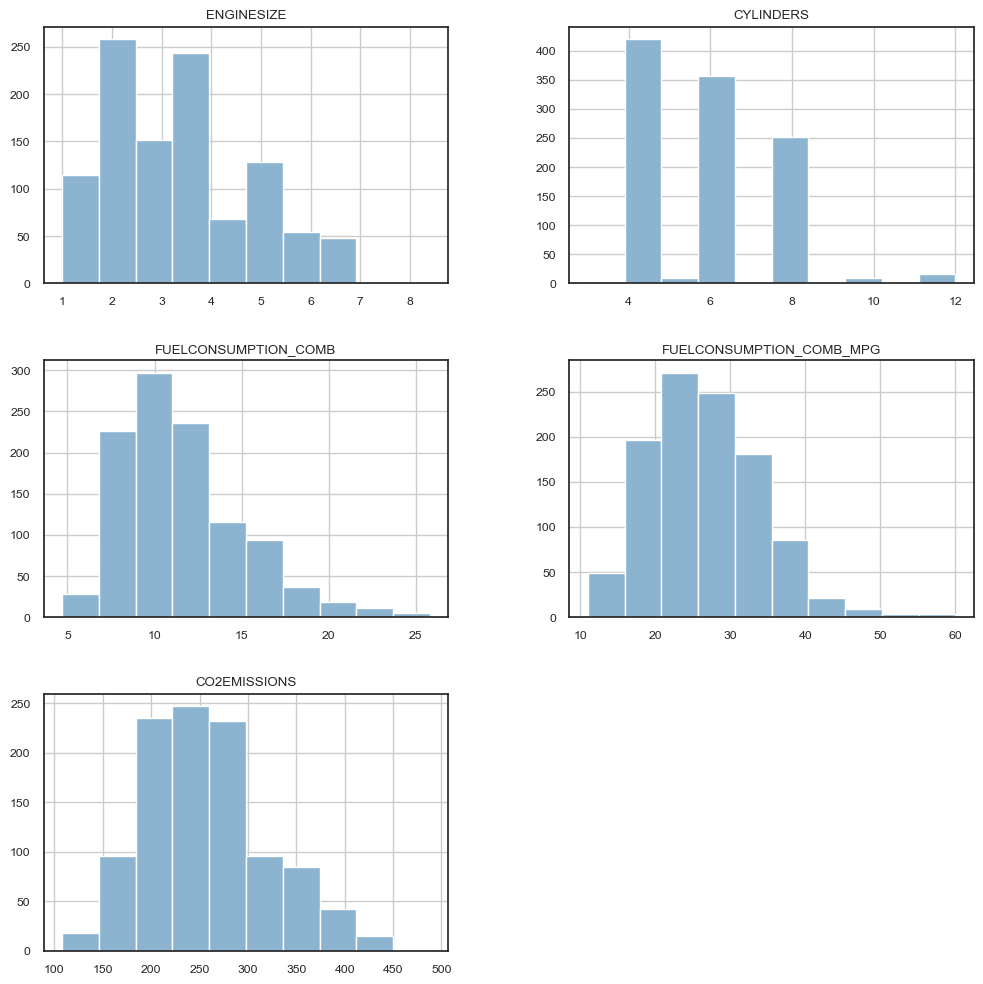

In [209]:
FCdf.hist()
plt.show()

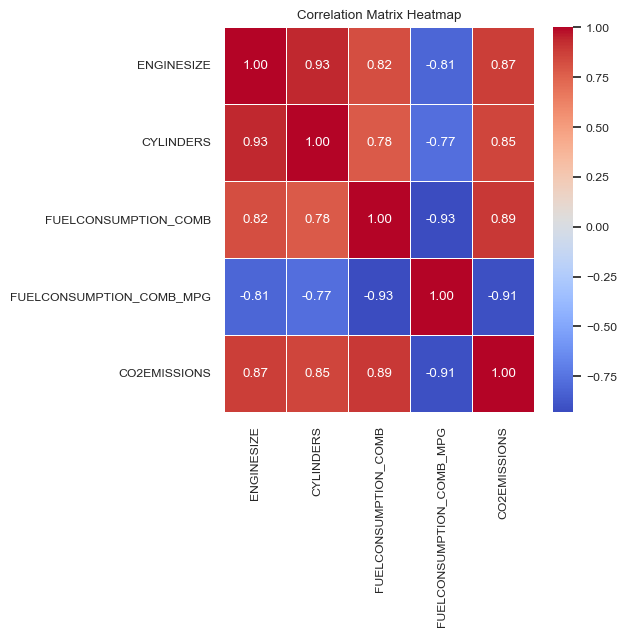

In [210]:
#HeatMap

 # Each columns should be float / Integer. 
correlation_matrix = FCdf.corr()


plt.figure(figsize = (5,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

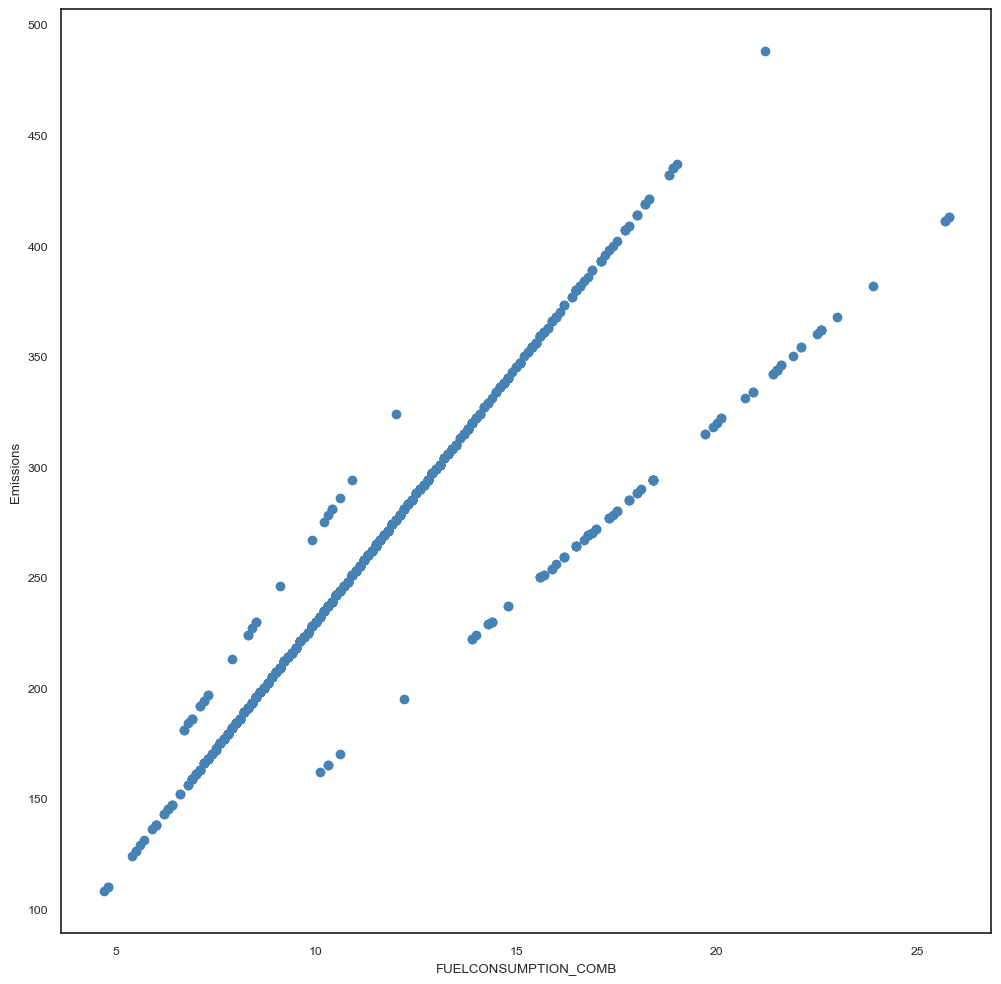

In [211]:
plt.scatter(FCdf.FUELCONSUMPTION_COMB, FCdf.CO2EMISSIONS, color="steelblue")

plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emissions")
plt.show()

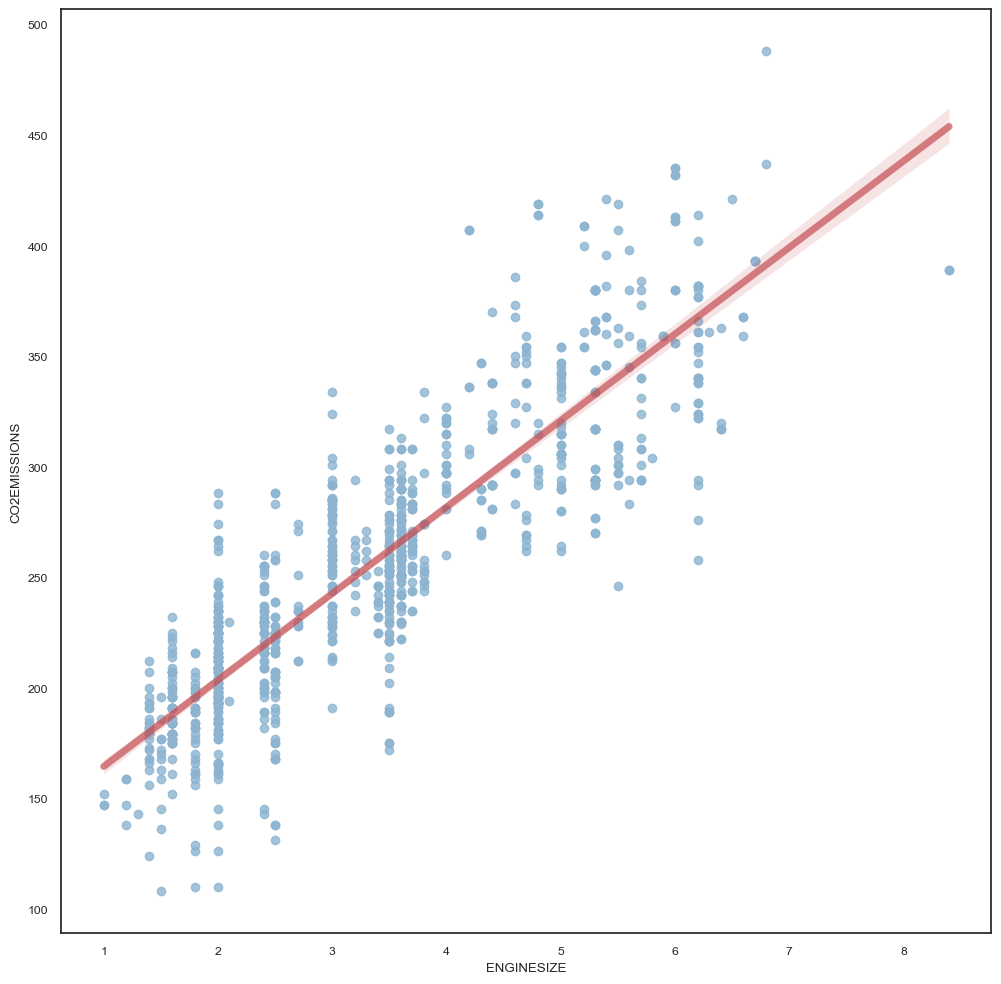

In [212]:
sns.regplot(x=FCdf['ENGINESIZE'], y=FCdf['CO2EMISSIONS'],line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

##### Split the targets into training/testing sets

In [213]:
# Split the data into training and testing sets 
"""
msk<0.8 means means that 20% of the data will be used for testing,
 and the remaining 80% will be used for training the model. 
 It's a common practice to split the data into training and testing sets to evaluate the
model's performance on unseen data.
"""
msk = np.random.rand(len(df)) < 0.8
train = FCdf[msk]
test = FCdf[~msk]

**Train** 

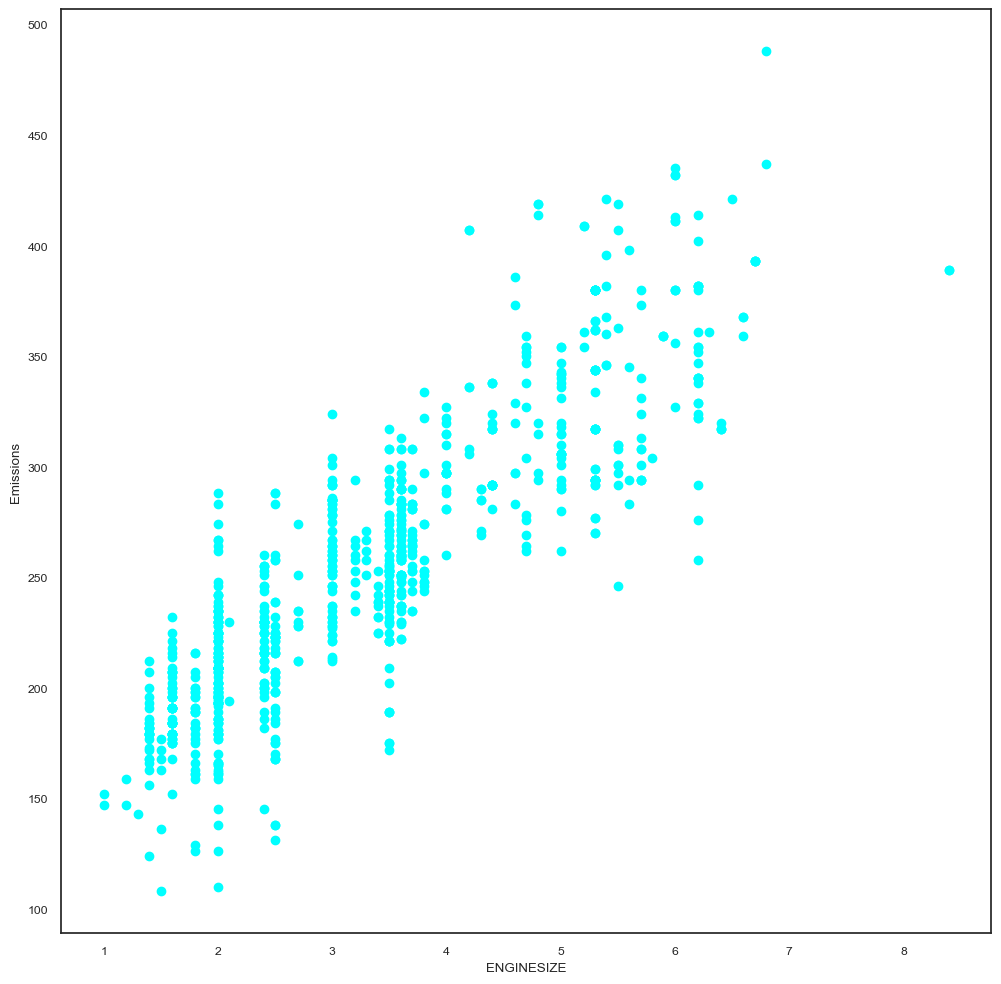

In [214]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="cyan")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

**Test**

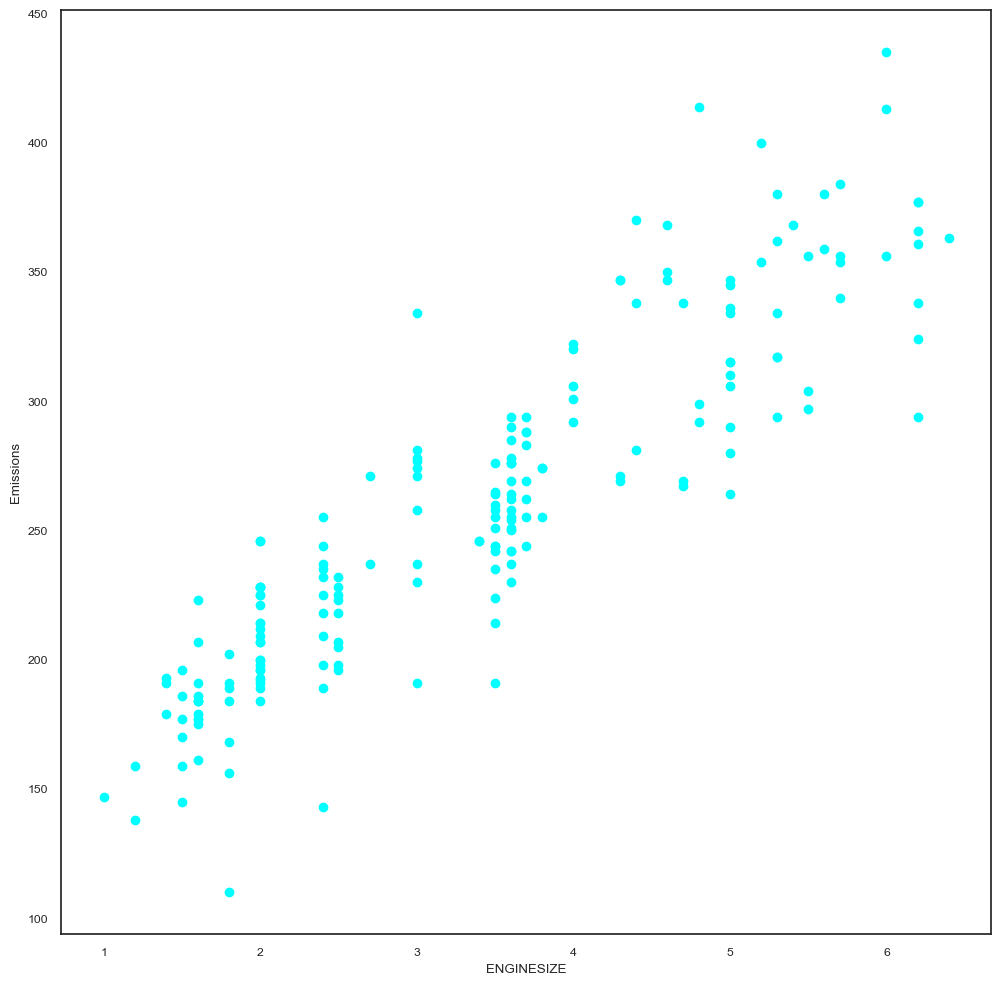

In [215]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color="cyan")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

### Linear Regression

**Linear regression**: To predict continuous values, use linear regression.

Simple Linear Regression : y = mx + b
- m is the slope
- b intercept
- y dependent variable
- x independent variable

##### Create linear regression model

In [216]:
#from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])


##### Train the model using the training sets

In [217]:
regr.fit(train_x, train_y)


LinearRegression()

In [218]:

# Make predictions on the test set
y_pred = regr.predict(train_x)

##### The Cefficients

In [219]:
# The coefficients
#ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB
print("Coefficients: \n", regr.coef_)# θ1
print(f"intercept : {regr.intercept_}") # θ0

Coefficients: 
 [[38.67560698]]
intercept : [126.6189096]


#### Simple Regression Formula
**y = mx + b**

- y = mx + b = regr.coef * x + intercept
- CO2EMISSIONS = regr.coef * ENGINESIZE + intercept

Text(0, 0.5, 'Emission')

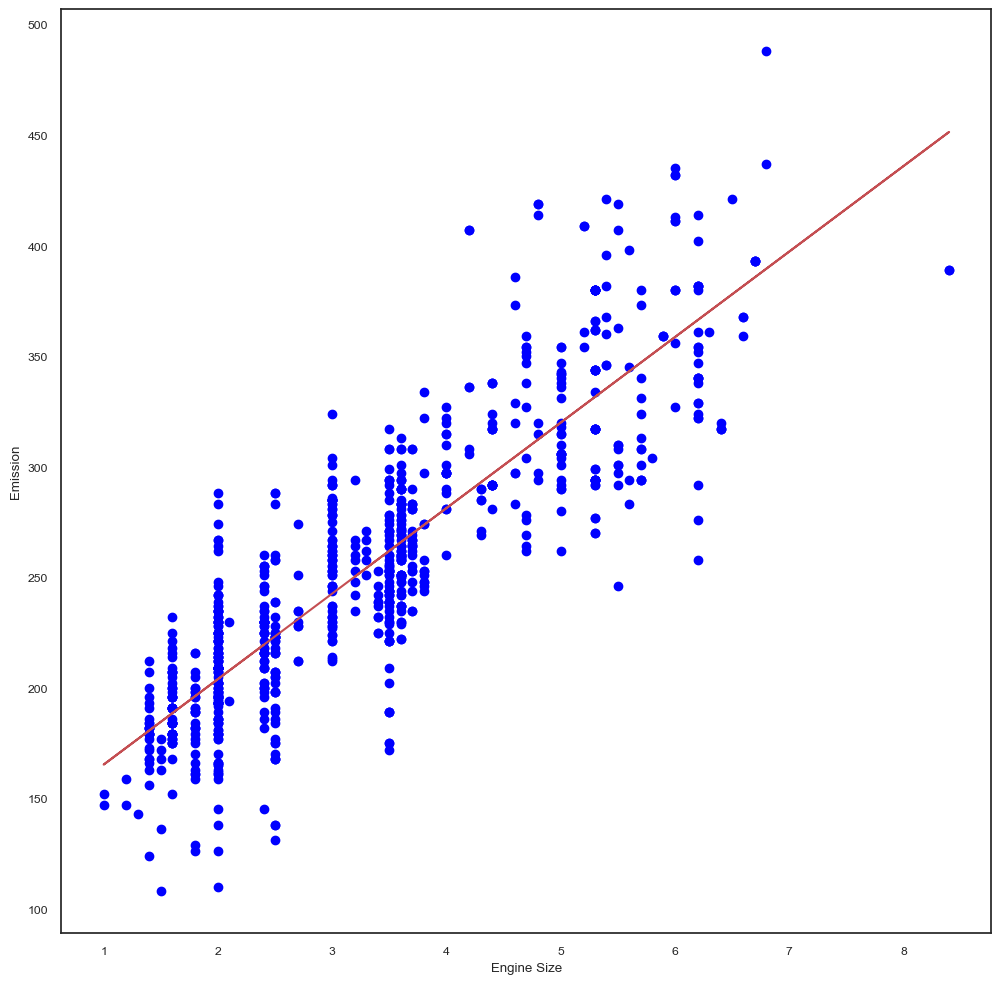

In [220]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")

**Model evaluation metrics**

##### The mean squared error
- Mean Absolute Error
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

In [221]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) #Actual value
test_y_ = regr.predict(test_x) # Predicted Value

- **Mean Absolute Error** : The Mean Absolute Error(MAE) is the average of all absolute errors.

MAE = (1/n) Σ(i=1 to n) |y_i – ŷ_i|

- **Residual** sum of squares : measures the level of variance in the error term, or residuals, of a regression model.

RSS = ∑ni=1 (yi - f(xi))2

- **R2 Score** :  (coefficient of determination) regression score function.Best possible score is 1.0 and it can be negative but **R2>0.92 meaningful for statistically**.

    For python : 

       - from sklearn.metrics import r2_score  
       - r2_score(test_y , test_y_) #Actual, predicted



In [222]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 21.81
Residual sum of squares (MSE): 832.59
R2-score: 0.80


**Step by Step Residual sum of squares (MSE)**

Real formula : RSS = ∑ni=1 (yi - f(xi))2

Python formula :np.mean((test_y_ - test_y) ** 2)

- (test_y_ - test_y) calculates the difference between the predicted values and the actual values.

- (test_y_ - test_y) ** 2 squares each of these differences.

- np.mean((test_y_ - test_y) ** 2) calculates the mean (average) of these squared differences, giving you the mean squared error.

- "%.2f" % np.mean((test_y_ - test_y) ** 2) is a string formatting operation that takes the mean squared error and formats it as a string with two decimal places (%.2f). The % operator is used for string formatting, and the value to be formatted (np.mean((test_y_ - test_y) ** 2)) is placed after the % sign

**Plot**

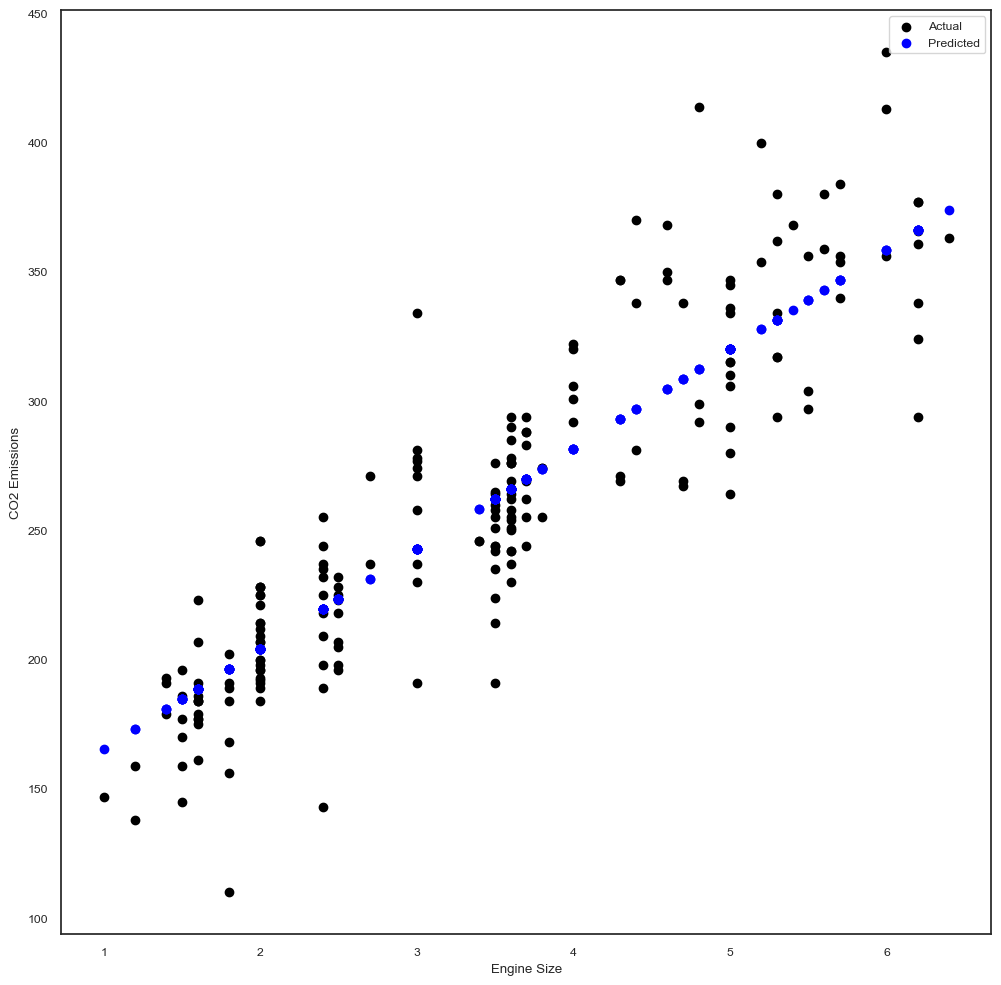

In [223]:
# Plot the actual vs. predicted values
plt.scatter(test_x, test_y, color='black', label='Actual')
plt.scatter(test_x, test_y_, color='blue', label='Predicted')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()

### Multiple Linear Regression 

y = m1x^1 + m2x^2 + m3x^3 + m4x^4 + m5x^5 + m6x^6 ………..+ b
- y is the dependent variable i.e. the variable that needs to be estimated and predicted.
- x is the independent variable i.e. the controllable variable. It is the input.
- m is the slope. 
- b is the intercept.

In [224]:
"""
As you remember : our linear regression formula ;
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

"""
""" 
Additionally : 
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

"""
#For multiple ;

#from sklearn import linear_model 
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(x, y)

LinearRegression()

In [225]:
print('Coefficients:', regr.coef_)

Coefficients: [[9.01277629 8.38024958 9.77742724]]


In [226]:
#Prediction - from test
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']]) # test y 
prediction_y=regr.predict(x)
#prediction_y=regr.predict(np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]))

**Model evaluation metrics**

In [227]:
print("Mean Squared Error (MSE) : %.5f"
      % np.mean((prediction_y - y) ** 2))

print('Variance score: %.5f' % regr.score(x, y)) # explained variance, best score is 1.0
print("Mean absolute error: %.5f" % np.mean(np.absolute(prediction_y - y)))
print("R2-score: %.6f" % r2_score(y , prediction_y))
# %.2f how many zero after dot.

Mean Squared Error (MSE) : 508.61050
Variance score: 0.87890
Mean absolute error: 16.67298
R2-score: 0.878902


**Plot**

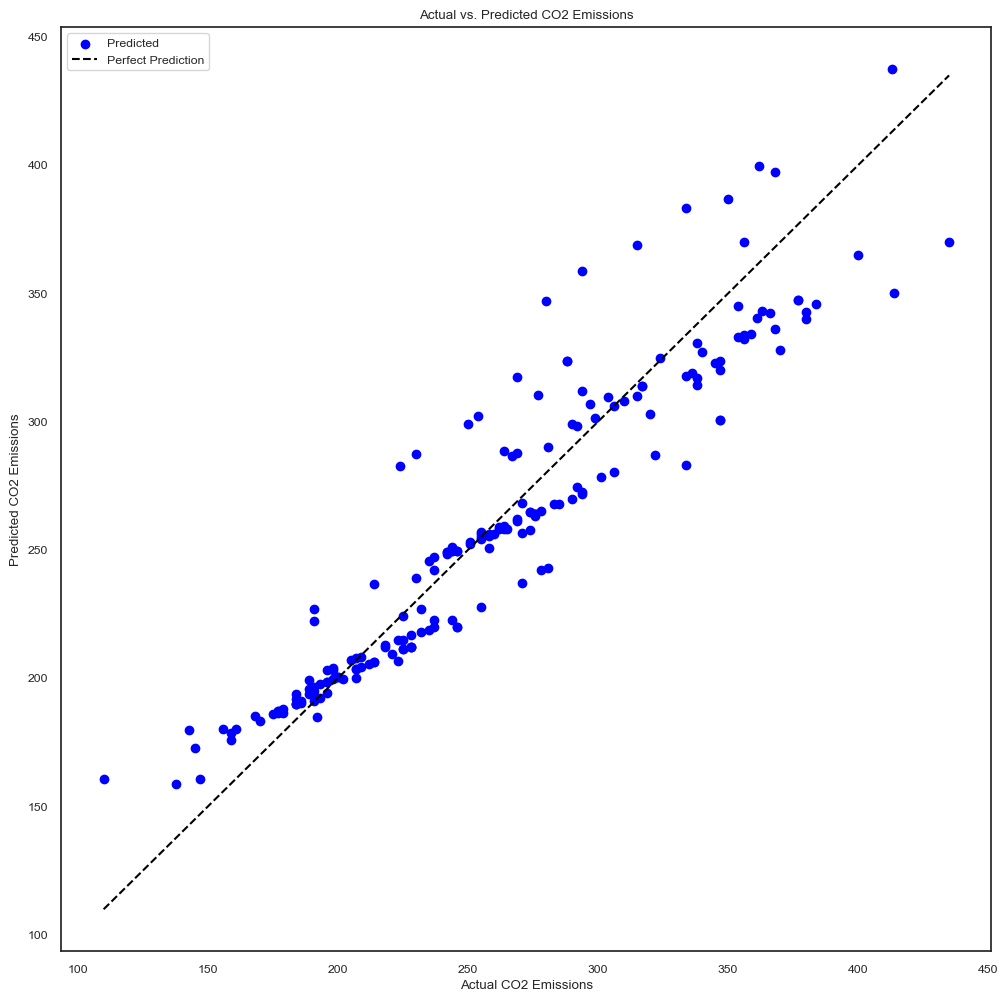

In [228]:
# Plot the actual vs. predicted values
plt.scatter(y, prediction_y, color='blue', label='Predicted')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='black', label='Perfect Prediction')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.legend()
plt.show()

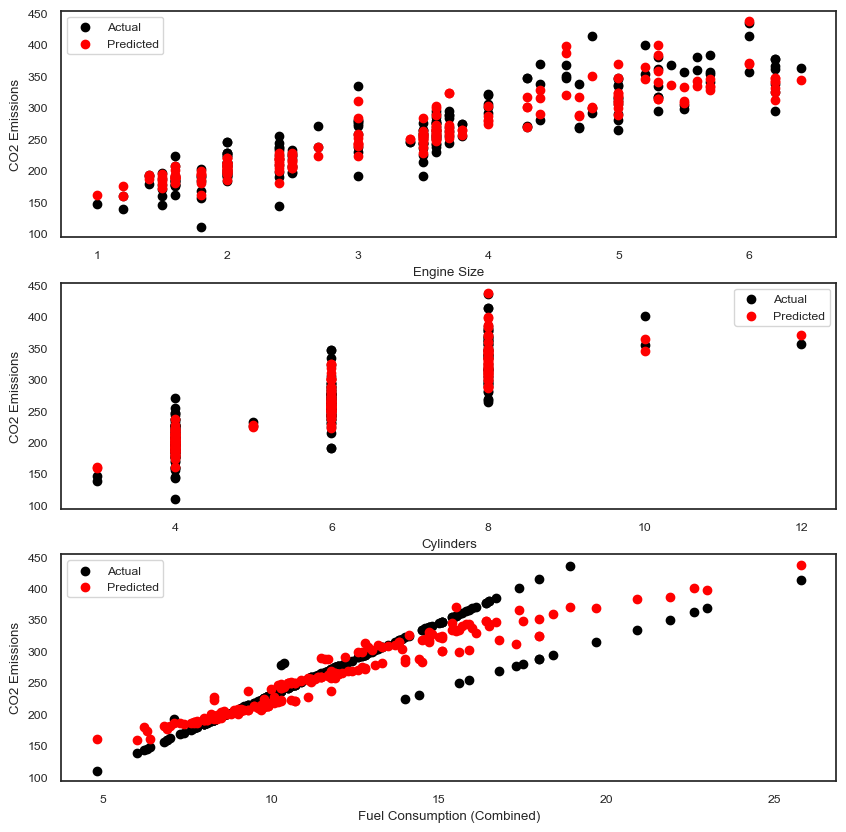

In [229]:

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 10))  # Adjust the number of subplots based on the number of features in 'x'

feature_names = ['Engine Size', 'Cylinders', 'Fuel Consumption (Combined)']
# Plot each feature against the actual and predicted values
for i in range(x.shape[1]):
    axs[i].scatter(x[:, i], y, color='black', label='Actual')
    axs[i].scatter(x[:, i], prediction_y, color='red', label='Predicted')
    axs[i].set_xlabel(feature_names[i])  # Set x-axis label
    axs[i].set_ylabel('CO2 Emissions')
    axs[i].legend()



plt.show()

### Logistic Regression

Logistic Regression is typically used for classification problems, where the target variable is categorical. However, the FuelConsumptionCo2 dataset seems to involve a regression task (predicting a numeric value - CO2 emissions) rather than a classification task. If you want to predict a numeric value (regression), Linear Regression is more appropriate. But for an example, we will apply logistic regression

In [230]:
#from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression model
regr = linear_model.LogisticRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(x, y)

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [231]:
print('Coefficients:', regr.coef_)

Coefficients: [[-1.52611036e-01  1.32480553e+00 -9.13919418e-01]
 [ 3.62766749e-01  1.14467923e+00 -1.03044764e+00]
 [-3.89694173e-01  1.08101885e+00 -6.44231529e-01]
 [ 5.05903650e-02  1.49755283e+00 -1.09724783e+00]
 [ 1.04007175e-02  9.11515581e-01 -6.59193869e-01]
 [ 6.95340637e-01  6.38958823e-01 -8.73483455e-01]
 [-3.90499037e-01  8.44531119e-01 -5.35015070e-01]
 [ 8.04158466e-01  1.04719608e+00 -1.11613412e+00]
 [-7.10686407e-01  7.07291716e-01 -5.26483501e-01]
 [ 4.04208267e-01  8.61360043e-01 -7.52904797e-01]
 [-1.29119425e+00 -1.25815962e-01  1.52779770e-01]
 [-1.43309103e+00  1.19137085e+00 -3.95378417e-01]
 [-7.01780714e-01  4.85003340e-01 -3.36887889e-01]
 [-1.18149406e+00  1.09068927e+00 -4.49366810e-01]
 [-7.93363418e-01  9.33608356e-01 -4.87332766e-01]
 [-6.07953845e-01 -7.24472631e-01  4.83324984e-01]
 [-1.54542672e+00  1.16513767e+00 -4.04717537e-01]
 [-1.04521757e+00 -1.05240366e+00  6.92972664e-01]
 [-1.22594327e+00  1.00148531e+00 -4.17697903e-01]
 [-1.17511250e+00

I wont countinue this example because of lots of coefficient. Our future analyzes will be fault(I tried). So its just logistic regression example. I look accuracy but ist too low. (9%)